# Time Series Analisys

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

%matplotlib inline

## Economic Data EDA

In [210]:
## economic_data = pd.read_csv("..\\data\\economic_time_series.csv", sep=";")
economic_data = pd.read_csv("data/economic_time_series.csv", sep=";", index_col=0)

In [205]:
## we remove days before 2010 for our analisys
economic_data.index = pd.to_datetime(economic_data.index)
economic_data["year"] = pd.DatetimeIndex(economic_data.index).year
economic_data = economic_data[economic_data.year >= 2010]

# remove the NaN lines for simplicity
clean_economic_data = economic_data.dropna()
economic_features = clean_economic_data.columns

# rescale the data to better visualization
scaler = StandardScaler().fit(clean_economic_data)

scaled_economic_data = scaler.transform(clean_economic_data)
scaled_economic_data = pd.DataFrame(scaled_economic_data,
                                    columns=economic_features)

### Correlation Analisys

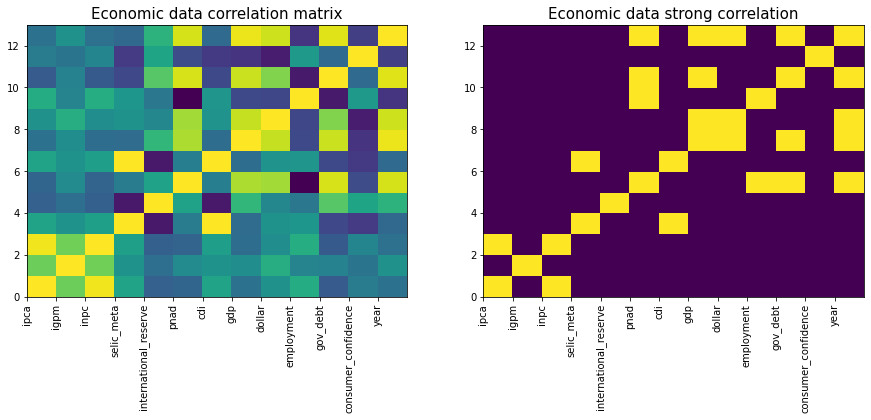

In [206]:
## plot the data to show correlation
corr_mat = np.corrcoef(scaled_economic_data.T)
fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].set_xticks(range(len(scaled_economic_data.columns)))
ax[0].set_xticklabels(scaled_economic_data.columns, rotation="vertical")
ax[0].pcolor(corr_mat)
ax[0].set_title("Economic data correlation matrix", fontsize=15)

ax[1].set_xticks(range(len(scaled_economic_data.columns)))
ax[1].set_xticklabels(scaled_economic_data.columns, rotation='vertical')
ax[1].pcolor(abs(corr_mat) > 0.8)
ax[1].set_title("Economic data strong correlation", fontsize=15)

plt.show()

Muitos dados apresentados são fortemente correlacionados, o que se é de esperar: flutuações em fatores econômicos globais influenciam de maneira semelhante índices semelhantes no mercado.

Algumas variáveis possuem também comportamentos opostos, ou *negativamente correlacinados*. Para fins de primeira análise, removemos as variáveis correlacionadas, evitando acúmulo de informação repetida.

In [207]:
# we remove strongly correlated features

to_remove = []
for col_i in range(len(economic_features)):
  for col_j in range(col_i+1, len(economic_features)):
    # if a feature is already to remove, go ahead
    if economic_features[col_j] in to_remove: continue

    # if a feature is correlated to a preceding, remove it
    if abs(corr_mat[col_i,col_j]) > 0.8 :
      to_remove.append(economic_features[col_j])

# print obtained results
print("From {} indexes, remove {} of them".format(
    len(economic_features), len(to_remove)))
print("Remove: ", to_remove)

From 13 indexes, remove 6 of them
Remove:  ['inpc', 'cdi', 'employment', 'gov_debt', 'year', 'dollar']


Text(0.5, 1.0, 'Scaled Representative Economic Data (2010 - 2020)')

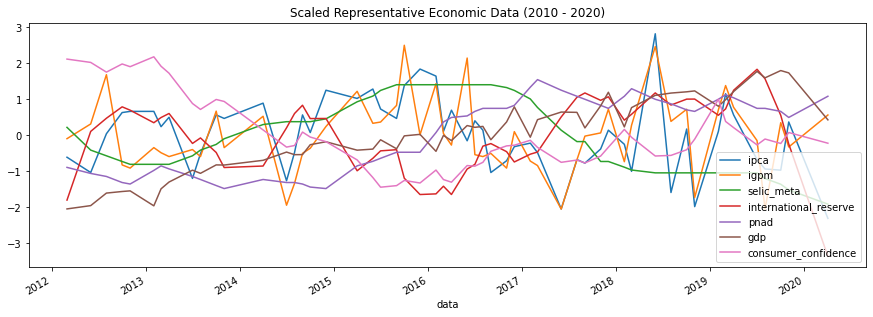

In [208]:
# use the simplified version of the data
simp_economic_data = economic_data.drop(to_remove, axis=1)

# remove the NaN lines for simplicity
clean_economic_data = simp_economic_data.dropna()
economic_features = clean_economic_data.columns

# rescale the data to better visualization
scaler = StandardScaler().fit(clean_economic_data)
scaled_economic_data = clean_economic_data.copy()
scaled_economic_data[economic_features] = scaler.transform(clean_economic_data)
scaled_economic_data = pd.DataFrame(scaled_economic_data)
scaled_economic_data.columns = economic_features

# plotamos os dados representativos
g = scaled_economic_data.plot(figsize=(15,5))
g.set_title("Scaled Representative Economic Data (2010 - 2020)")

Resumimos o conjunto de variáveis inicial a 7 representativas, a partir das quais podemos analisar as tendencias do mercado, e considerar impactos de eventos econômicos relevantes em certos períodos como a crise de 2014 e a eleição de Dinald Trump em 2016.

## Tweeter Text Analisys

Desejamos fazer uma primeira análise do conteúdos dos Tweets da família Bolsonaro, além da análise quantitativa.

In [221]:
# tweeys_data = pd.read_csv("..\\data\\preprocessed_tweets.csv", sep="~")
tweeys_data = pd.read_csv("data/preprocessed_tweets.csv", sep="~", index_col=0)
tweeys_data["date"] = pd.to_datetime(tweeys_data["date"])
tweeys_data.set_index("date", inplace=True)

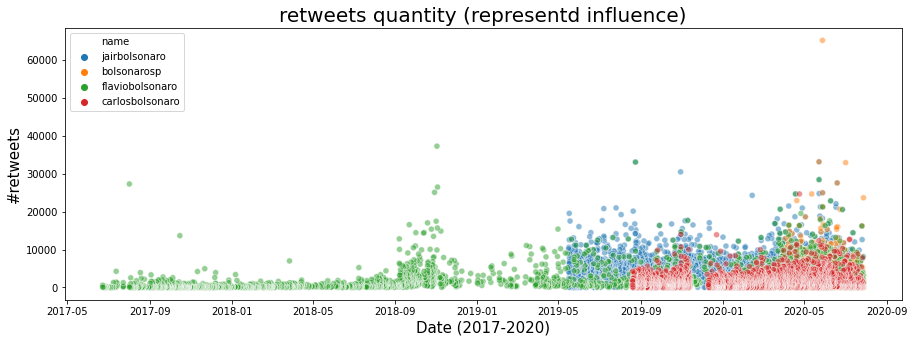

In [234]:
fig, ax = plt.subplots(figsize=(15,5))
sns.scatterplot(x = tweeys_data.index, y = "retweet_count",
                data=tweeys_data, hue="name", alpha=0.5, ax=ax)

ax.set_xlabel("Date (2017-2020)", fontsize=15)
ax.set_ylabel("#retweets", fontsize=15)
ax.set_title("retweets quantity (representd influence)", fontsize=20)

plt.show()

## Time Series Discussion: Tweets and Economic Data

Levantamos alguns questionamentos das séries com relação alguns eventos econômios que podem representar impactos relevantes, assim como a relação de influencia/correlação dos tweets com o mercado.

* Quais eventos entre 2010 e 2020 explicam impactos, ou comortamentos exernos nos dados?
* Esses impactos devem ser removidos, ou o mais adequado é mantê-los em análise como explicadores de eventuais correlações com os tweets?
* Como podemos relacionar termos mais frequentes e um período com os fatos econômicos apresentados? Quando termos são anteriores às notícias deveículos importantes no mesmo período, isso prediz impacto dos tweets na economia?

Resumo de algumas notícias na útimas década: https://pt.wikipedia.org/wiki/D%C3%A9cada_de_2010#Cronologia_de_eventos

In [209]:
# your code here